# Power Forecasting using RNN-LSTM Network for Regression

**Prediction:** Power for the unknown period 17/11/2022 - 23/11/2022

**Data Range:** 1/10/2022 - 16/11/2022

# LSTM (Long Short-Term Memory) :
It is a RNN trained using Backpropagation through time that overcomes the vanishing gradient problem. Instead of Neurons, **LSTM** networks have memory **blocks** connected through layers.

### Blocks:

Contain **gates** that manage the block state and output.

## Types of Gates:

1. **Forget gate :** Conditionally decides what information to throw away from the blocks.

2. **Input gate :**conditionally decides which values from the input to update the memory state

3. **Output gate :**conditionally decides what to output based on input and the memory of the block

In [65]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

# For defining the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# For Normalisation
from sklearn.preprocessing import MinMaxScaler  
from sklearn.metrics import mean_squared_error

In [66]:
#fix the random seed 
tf.random.set_seed(42)

In [67]:
#Load the dataset
dataframe = pd.read_excel('/content/cleaningtemplate.xlsx', usecols=[5])
dataset = dataframe.values
dataset = dataset.astype('float32')

In [68]:
new_data= pd.read_excel('/content/cleaningtemplate.xlsx')

In [69]:
new_data

,Holiday,Bridge,day,Date,hour,power,temperature,variable2
0,0.0,0.0,Sat,01/10/2022,00:00,14889.0,6.0,60165.0
1,0.0,0.0,Sat,01/10/2022,01:00,14812.0,5.0,56678.0
2,0.0,0.0,Sat,01/10/2022,02:00,14469.0,5.0,55780.0
3,0.0,0.0,Sat,01/10/2022,03:00,14670.0,5.0,53160.0
4,0.0,0.0,Sat,01/10/2022,04:00,14834.0,5.0,50207.0
...,...,...,...,...,...,...,...,...
1291,0.0,0.0,Wed,23/11/2022,19:00,NaN,7.0,73029.0
1292,0.0,0.0,Wed,23/11/2022,20:00,NaN,7.0,71601.0
1293,0.0,0.0,Wed,23/11/2022,21:00,NaN,7.0,67190.0
1294,0.0,0.0,Wed,23/11/2022,22:00,NaN,6.0,63621.0


In [70]:
dataframe

,power
0,14889.0
1,14812.0
2,14469.0
3,14670.0
4,14834.0
...,...
1291,NaN
1292,NaN
1293,NaN
1294,NaN


In [71]:
dataframe.isna().sum()
# dataframe=np.any(np.isnan(dataframe))
# dataframe=dataframe.replace(nan,0)

power    168
dtype: int64

In [72]:
dataframe=dataframe.dropna()

In [73]:
dataframe

,power
0,14889.0
1,14812.0
2,14469.0
3,14670.0
4,14834.0
...,...
1123,23320.0
1124,22946.0
1125,21309.0
1126,21319.0


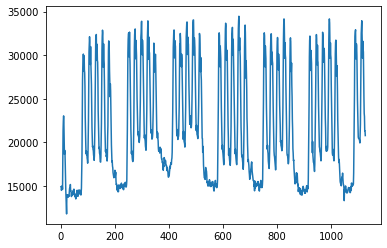

In [74]:
plt.plot(dataset)
plt.show()

**Normalize** the dataset using the **MinMaxScaler** preprocessing class from the scikit-learn library.

In [75]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [76]:
dataset

array([[0.13758314],
       [0.13419092],
       [0.11908013],
       ...,
       [       nan],
       [       nan],
       [       nan]], dtype=float32)

split the ordered dataset into **train and test datasets**. 

In [77]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

868 428


defining a **function** to create a new dataset

The function takes **two arguments**: 
1. the **dataset**, which is a NumPy array you want to convert into a dataset
2. the **look_back**, which is the number of previous time steps to use as input    variables to predict the next time period—in this case, defaulted to 1.

This default will create a dataset where,

**X** is the **Power at a given time (t)**, and

**Y** is the **power at the next time (t + 1)**.

In [78]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

##  function to prepare the train and test datasets for modeling.

In [79]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

The LSTM network expects the input data (X) to be provided with a specific array structure in the form of [samples, time steps, features].

Currently, the data is in the form of [samples, features],

**Transforming** the prepared train and test input data into the expected structure using numpy.reshape()

In [80]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

LSTM network **Model**

In [82]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=500, batch_size=1, verbose=2)

Epoch 1/500
866/866 - 3s - loss: 0.0928 - 3s/epoch - 3ms/step
Epoch 2/500
866/866 - 1s - loss: 0.0214 - 1s/epoch - 1ms/step
Epoch 3/500
866/866 - 1s - loss: 0.0064 - 1s/epoch - 1ms/step
Epoch 4/500
866/866 - 1s - loss: 0.0050 - 1s/epoch - 1ms/step
Epoch 5/500
866/866 - 1s - loss: 0.0049 - 1s/epoch - 1ms/step
Epoch 6/500
866/866 - 1s - loss: 0.0049 - 1s/epoch - 1ms/step
Epoch 7/500
866/866 - 1s - loss: 0.0049 - 1s/epoch - 1ms/step
Epoch 8/500
866/866 - 1s - loss: 0.0049 - 1s/epoch - 1ms/step
Epoch 9/500
866/866 - 1s - loss: 0.0048 - 1s/epoch - 1ms/step
Epoch 10/500
866/866 - 1s - loss: 0.0048 - 1s/epoch - 1ms/step
Epoch 11/500
866/866 - 1s - loss: 0.0048 - 1s/epoch - 1ms/step
Epoch 12/500
866/866 - 1s - loss: 0.0048 - 1s/epoch - 1ms/step
Epoch 13/500
866/866 - 1s - loss: 0.0047 - 1s/epoch - 1ms/step
Epoch 14/500
866/866 - 1s - loss: 0.0047 - 1s/epoch - 1ms/step
Epoch 15/500
866/866 - 1s - loss: 0.0047 - 1s/epoch - 1ms/step
Epoch 16/500
866/866 - 1s - loss: 0.0047 - 1s/epoch - 1ms/step
E

In [83]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 4)                 96        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


**Predictions**

In [84]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [85]:
trainPredict

array([[0.14128794],
       [0.13814387],
       [0.12428354],
       [0.13237673],
       [0.13904099],
       [0.14588185],
       [0.12894408],
       [0.28162053],
       [0.42862216],
       [0.48121095],
       [0.5063946 ],
       [0.4701269 ],
       [0.38708642],
       [0.30440885],
       [0.3252287 ],
       [0.3154022 ],
       [0.25543344],
       [0.17364042],
       [0.12552631],
       [0.09128761],
       [0.06846786],
       [0.02450673],
       [0.10421111],
       [0.10176122],
       [0.1022272 ],
       [0.10444485],
       [0.09354504],
       [0.09354504],
       [0.09827702],
       [0.10055907],
       [0.0975052 ],
       [0.1132692 ],
       [0.13314603],
       [0.13330807],
       [0.13185076],
       [0.151741  ],
       [0.12224338],
       [0.12252309],
       [0.11473092],
       [0.09638777],
       [0.11125927],
       [0.11090516],
       [0.10569304],
       [0.10288785],
       [0.11682987],
       [0.10518572],
       [0.12504497],
       [0.118

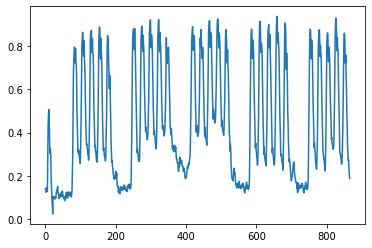

In [86]:
plt.plot(trainPredict)

In [87]:
testPredict

array([[0.15809643],
       [0.16701522],
       [0.15922244],
       [0.20046075],
       [0.20924324],
       [0.20267254],
       [0.20614968],
       [0.20493159],
       [0.16949996],
       [0.14633438],
       [0.15373015],
       [0.11881556],
       [0.1282996 ],
       [0.12264297],
       [0.13679999],
       [0.12436364],
       [0.1310019 ],
       [0.1128746 ],
       [0.13322704],
       [0.10522474],
       [0.12584734],
       [0.12396315],
       [0.10843138],
       [0.10460076],
       [0.11425654],
       [0.10304337],
       [0.11074782],
       [0.13521463],
       [0.13785861],
       [0.1431718 ],
       [0.1360679 ],
       [0.1310423 ],
       [0.12882319],
       [0.11985022],
       [0.12484455],
       [0.11153483],
       [0.11853725],
       [0.11090516],
       [0.12612832],
       [0.12596776],
       [0.13322704],
       [0.1392858 ],
       [0.14629321],
       [0.13753274],
       [0.11730597],
       [0.14091985],
       [0.1422703 ],
       [0.131

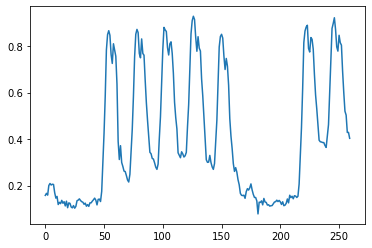

In [88]:
plt.plot(testPredict)

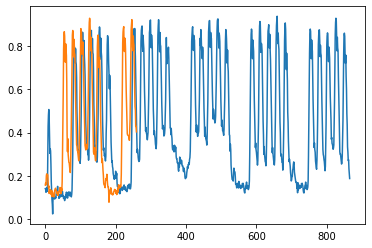

In [89]:
plt.plot(trainPredict)
plt.plot(testPredict)

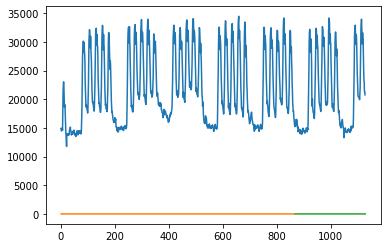

In [90]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [91]:
# pd.DataFrame(testPredict).to_excel('test.xlsx', sheet_name='sheet1', index=False)

In [92]:
# columnwise=np.repeat(testPredict, new_data, axis=1)

In [93]:
y_prediction_future= scaler.inverse_transform(testPredict)[:,0]

In [95]:
pd.DataFrame(y_prediction_future).to_excel('test.xlsx', sheet_name='sheet1', index=False)